<a href="https://colab.research.google.com/github/MaricelaMH/SIMULACION-II/blob/main/Cola_dos_servidores_serie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COLA-CON-DOS-SERVIDORES-EN-SERIE
Un sistema de colas con dos servidores en serie es una forma en la que los clientes deben pasar por dos etapas de un servicio secuenciales antes de salir del sistema. Cada etapa tiene su propio servidor, y los clientes deben ser atendidos por el primer servidor antes de avanzar al segundo.

Por lo que implementarenos el siguiente pseudocódigo para modelar un sistema de colas con dos servidores en serie.

![texto alternativo](https://drive.google.com/uc?id=1mjcu1qwZJJAWgeYsTQn8wLT84f-IEMJi)





## VARIABLES - - INICIALES
1. Primero definimos cada variable para ver el comportamiento que tendran:

$t=0:$ Tiempo inicial 0

$n_1$: No hay clientes en el primer servidor

$n_2$: N o hay clientes en el segundo servidor

$N_{LL}$: Número de llegadas hasta el instante $t$

$N_s$: Número de clientes que han salido del sistema

$T_0$: Tiempo de llegada de un cliente

$t_{LL}$: Tiempo de la siguiente llegada (este sera igual al tiempo de llegada inicial generado)

$t_1$:Tiempo de finalizacion del servicio en el primer servidor (si no hay clientes siendo antenidos, el tiempo es infinito)

$t_2$:Tiempo de finalizacion del servicio en el segundo servidor (si no hay clientes siendo antenidos, el tiempo es infinito)

Por lo que codificamos lo siguiente


2. Recordemos que en el ejercicio de cola con un servidor utilizamos la distribución exponencial dado que modela bien los tiempos entre eventos aleatorios e independientes, y tiene propiedades matemáticas que facilitan el análisis de sistemas con llegadas y tiempos de servicio aleatorios, por lo que la utilizaremos para el comportamiento de llegadas y el tiempo entre llegadas como una distribución exponencial.

In [63]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Función para generar tiempos de llegada y servicio (usaremos una distribución exponencial para este ejemplo)
def tiempo(lamda):
    return np.random.exponential(1/lamda)

3. Inicializamos nuestras variables

In [64]:
# Parámetros de simulación
T = 120  # Tiempo máximo de simulación
lam = 1/5  # Tasa media de llegadas (un cliente cada 5 unidades de tiempo)
mu1 = 1/3  # Tasa de servicio del servidor 1
mu2 = 1/4  # Tasa de servicio del servidor 2

# Variables iniciales
t = 0  # Tiempo inicial
n1 = 0  # Número de clientes en el servidor 1
n2 = 0  # Número de clientes en el servidor 2
NLL = 0  # Número total de llegadas
NS = 0  # Número de clientes que han salido del sistema

tLL = tiempo(lam)  # Tiempo de la próxima llegada
t1 = math.inf  # Tiempo de finalización del primer servidor (inicialmente infinito)
t2 = math.inf  # Tiempo de finalización del segundo servidor (inicialmente infinito)


4. Inicializamos dos listas para almacenar los tiempos de llegadas y salidad.

In [65]:
LL = [] # Lista para tiempos de llegadas
S = []   # Lista para tiempos de salidas

5.  Describimos los casos establecidos en el pseudocódigo:

* Caso 1: Cuando una llegada ocurre.
* Caso 2: Cuando un cliente finaliza su servicio en el servidor 1 y pasa al servidor 2.
* Caso 3: Cuando un cliente finaliza su servicio en el servidor 2 y sale del sistema.

In [66]:
# Simulación
while t < T:

  # Caso 1: Llegada de un cliente
    if tLL <= t1 and tLL <= t2:
        t = tLL     # Actualiza el tiempo a la llegada del cliente
        NLL += 1    # Contador de llegadas
        n1 += 1     # Contador de número de clientes del servidor 1
        LL.append(t)  # Almacenamos los tiempos de llegada

        if n1 == 1:  # Si el primer servidor estaba vacío
            Y1 = tiempo(mu1)  # Generamos tiempo de servicio del servidor 1
            t1 = t + Y1  # Actualizamos el tiempo final

        tLL = t + tiempo(lam)  # Generamos próxima llegada

    # Caso 2: Un cliente termina en el servidor 1
    elif tLL > t1 and t1 <= t2:
        t = t1   # El tiempo se actualiza al terminar el primer servidor
        n1 -= 1  # Si el cliente termina en el primer servidor se reduce el numero de clientes
        n2 += 1  # Si el cliente ha terminado en el servidos 1 pasa al servidor 2 por lo que este aumenta

        if n1 > 0:  # Si hay más clientes en la cola del servidor 1
            Y1 = tiempo(mu1)  # Generamos tiempo de servicio del servidor 1
            t1 = t + Y1  # Actualizamos el tiempo final del servicio 1
        else:
            t1 = math.inf  # No hay más clientes en el servidor 1

        if n2 == 1:  # Si el servidor 2 estaba vacío, generar tiempo de servicio
            Y2 = tiempo(mu2)  # Generamos tiempo de servicio del servidor 2
            t2 = t + Y2   # Actualzamos el tiempo final del servicio 2

   # Caso 3: Un cliente termina en el servidor 2
    elif t2 < t1 and t2 < tLL:
        t = t2    # El tiempo se actualiza al terminar el segundo servidor
        NS += 1   # Contador de clientes que han salido del sistema
        n2 -= 1   # Si el cliente termina en el segundo servidor se reduce el numero de clientes
        S.append(t) # Almacenamos los tiempos de salida

        if n2 > 0:  # Si hay más clientes en la cola del servidor 2
            Y2 = tiempo(mu2)  # Generamos tiempo de servicio para el sig. cliente en el servidor 2
            t2 = t + Y2  # Actualizamos el tiempo final del servicio 2
        else:
            t2 = math.inf  # No hay más clientes en el servidor 2



Por lo que podemos mostrar cual fue el timpo y el número de clientes en el sistema, asi:

In [67]:
# Resultados finales
print(f"Total de clientes que llegaron: {NLL}")
print(f"Total de clientes que salieron: {NS}")
print(f"Historial de llegadas: {LL}")
print(f"Historial de salidas: {S}")

Total de clientes que llegaron: 22
Total de clientes que salieron: 22
Historial de llegadas: [1.7222680937638224, 6.636615988563348, 8.344384390285732, 9.307499246380338, 18.87613271680019, 19.15764833687413, 19.707018551661328, 22.043845755673463, 25.25416463504141, 27.372949820602216, 29.58928696587228, 33.863264915220846, 40.273961547318976, 50.513439061319794, 52.43351982544657, 53.47597733984086, 54.22387300149068, 60.39806110194863, 60.90861002171894, 74.81697500003713, 93.1092167031807, 115.54425323011652]
Historial de salidas: [6.726265189085276, 9.184044415065625, 13.274065634722497, 15.925838952015859, 28.870180127056017, 30.671951734975544, 32.43799172392828, 36.85596255437081, 39.091476395608254, 43.29176685796254, 47.2424175297389, 48.840198424369866, 57.3095231491265, 61.9531246345738, 64.45360861926969, 67.755539980352, 68.43712355305604, 74.77582250275964, 82.98684009930945, 83.51687052528209, 96.92418445301743, 121.29280875523298]


Veamos el comportamiento del tiempo por cada cliente durante el servicio

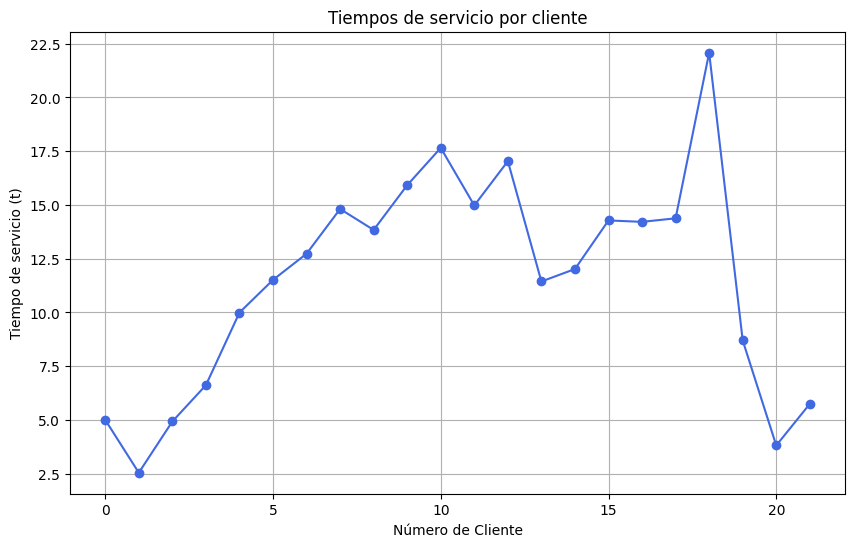

In [68]:
# Calcular los tiempos de servicio por cliente
tiempos_servicio = []
for i in range(len(S)):
  tiempos_servicio.append(S[i] - LL[i])

# Graficar los tiempos de servicio por cliente
plt.figure(figsize=(10, 6))
plt.plot(tiempos_servicio, marker='o', linestyle='-',color='#4169E1')
plt.xlabel('Número de Cliente')
plt.ylabel('Tiempo de servicio (t)')
plt.title('Tiempos de servicio por cliente')
plt.grid(True)
plt.show()

Damos a conocer los tiempos por cliente:

In [69]:
# Calcular los tiempos de servicio por cliente
tiempos_servicio_por_cliente = []
for i in range(len(S)):
  tiempos_servicio_por_cliente.append(S[i] - LL[i])

# Mostrar el tiempo de servicio por cliente
print("Tiempo de servicio por cliente:")
for i, tiempo in enumerate(tiempos_servicio_por_cliente):
  print(f"Cliente {i+1}: {round(tiempo, 2)}")


Tiempo de servicio por cliente:
Cliente 1: 5.0
Cliente 2: 2.55
Cliente 3: 4.93
Cliente 4: 6.62
Cliente 5: 9.99
Cliente 6: 11.51
Cliente 7: 12.73
Cliente 8: 14.81
Cliente 9: 13.84
Cliente 10: 15.92
Cliente 11: 17.65
Cliente 12: 14.98
Cliente 13: 17.04
Cliente 14: 11.44
Cliente 15: 12.02
Cliente 16: 14.28
Cliente 17: 14.21
Cliente 18: 14.38
Cliente 19: 22.08
Cliente 20: 8.7
Cliente 21: 3.81
Cliente 22: 5.75


Finalmente calculemos el tiempo total del servicio, el cual es

In [70]:
total_tiempo = 0
for i in range(len(S)):
  if i < len(LL):
    total_tiempo += (S[i] - LL[i])

print(f"Tiempo total del servicio: {round(total_tiempo, 2)}")

Tiempo total del servicio: 254.24
